# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
from datetime import date

import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
df= pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.options.display.max_columns=300
pd.options.display.max_rows=500

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

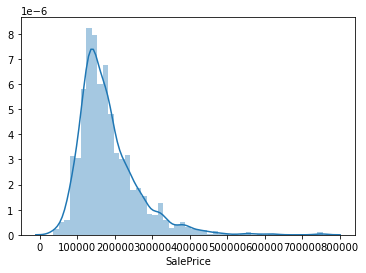

In [7]:
#checking skewness in target variable
sns.distplot(df['SalePrice'])

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [8]:
df['SalePrice'].skew()

1.8828757597682129

### The distribution is highly skewed

Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).

In [9]:
df['SalePrice'].kurtosis()

6.536281860064529

### It is a leptokurtic

In [10]:
#The age of the property can be determined using the YearBuilt column
todays_date = date.today()
df['AgeProperty']=todays_date.year-df['YearBuilt']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeProperty
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,18
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,45
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,20
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,106
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21


In [11]:
#Similarly the other year columns can be handled in same fashion
df['AgeRemodelled']=todays_date.year-df['YearRemodAdd']
df['AgeSold']=todays_date.year-df['YrSold']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeProperty,AgeRemodelled,AgeSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,18,18,13
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,45,45,14
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,20,19,13
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51,15
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21,21,13


## Handling missing data

In [12]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['MiscFeature']=df['MiscFeature'].fillna('None')
df['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [14]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['Alley']=df['Alley'].fillna('None')
df['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [16]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['BsmtQual']=df['BsmtQual'].fillna('None')
df['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [18]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [19]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['BsmtCond']=df['BsmtCond'].fillna('None')
df['BsmtCond'].value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [20]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [21]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['BsmtExposure']=df['BsmtExposure'].fillna('None')
df['BsmtExposure'].value_counts()

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [22]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [23]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['BsmtFinType1']=df['BsmtFinType1'].fillna('None')
df['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [24]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [25]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['BsmtFinType2']=df['BsmtFinType2'].fillna('None')
df['BsmtFinType2'].value_counts()

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [26]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [27]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['FireplaceQu']=df['FireplaceQu'].fillna('None')
df['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [28]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [29]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['GarageType']=df['GarageType'].fillna('None')
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [30]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [31]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['GarageFinish']=df['GarageFinish'].fillna('None')
df['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [32]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [33]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['GarageQual']=df['GarageQual'].fillna('None')
df['GarageQual'].value_counts()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [34]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [35]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['GarageCond']=df['GarageCond'].fillna('None')
df['GarageCond'].value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [36]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [37]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['PoolQC']=df['PoolQC'].fillna('None')
df['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [38]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [39]:
#The data dictionary showed that there is a category as NA which python treated as null value. hence making it a different category
df['Fence']=df['Fence'].fillna('None')
df['Fence'].value_counts()


None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [40]:
#converting some columns to object type because they are categorical attributes
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')
df['MoSold']=df['MoSold'].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeProperty,AgeRemodelled,AgeSold
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,18,18,13
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,45,45,14
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,20,19,13
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,106,51,15
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,21,21,13


In [43]:
# dropping id column as it is not required for analysis
df= df.drop('Id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [44]:
#Defining function to get metadata about my dataframe
def get_info(dataframe):
    data=pd.DataFrame({
        'Total Element': dataframe.count(),
        'Datatype': dataframe.dtypes,
        'Null Count': dataframe.isnull().sum(),
        'Null Percentage': dataframe.isnull().sum()/len(dataframe) * 100
    })
    return data

In [45]:
get_info(df)

,Total Element,Datatype,Null Count,Null Percentage
MSSubClass,1460,int64,0,0.000000
MSZoning,1460,object,0,0.000000
LotFrontage,1201,float64,259,17.739726
LotArea,1460,int64,0,0.000000
Street,1460,object,0,0.000000
Alley,1460,object,0,0.000000
LotShape,1460,object,0,0.000000
LandContour,1460,object,0,0.000000
Utilities,1460,object,0,0.000000
LotConfig,1460,object,0,0.000000


## Imputing Some more missing values

In [46]:
#Filling the missing data with mean/mode
df['LotFrontage'].describe(percentiles=[.25,.5,.75,.9,.95])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [47]:
#the max value is far greater than 95th percentile hence imputing with median
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [48]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [49]:
#Since this is categorical type hence mputing with mode
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].value_counts().index[0])
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [50]:
df['MasVnrArea'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [51]:
#presece of outlier hence imputing with median
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'].isna().sum()

0

In [52]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [53]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].value_counts().index[0])
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [55]:
#imputing the attribute with mode  
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageYrBlt'].isna().sum()

0

In [56]:
# Calculating age of the garage column
df['AgeGarage']=todays_date.year-df['GarageYrBlt']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [58]:
get_info(df)

,Total Element,Datatype,Null Count,Null Percentage
MSSubClass,1460,int64,0,0.0
MSZoning,1460,object,0,0.0
LotFrontage,1460,float64,0,0.0
LotArea,1460,int64,0,0.0
Street,1460,object,0,0.0
Alley,1460,object,0,0.0
LotShape,1460,object,0,0.0
LandContour,1460,object,0,0.0
Utilities,1460,object,0,0.0
LotConfig,1460,object,0,0.0


## All the missing values have been imputed.
#### Now working on converting some of the numerical columns into categorical columns because they would be used as such.

In [59]:
#Converting some more categorical attributes to object datatype
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [60]:
df['MSSubClass']=df['MSSubClass'].astype('object')
get_info(df)

,Total Element,Datatype,Null Count,Null Percentage
MSSubClass,1460,object,0,0.0
MSZoning,1460,object,0,0.0
LotFrontage,1460,float64,0,0.0
LotArea,1460,int64,0,0.0
Street,1460,object,0,0.0
Alley,1460,object,0,0.0
LotShape,1460,object,0,0.0
LandContour,1460,object,0,0.0
Utilities,1460,object,0,0.0
LotConfig,1460,object,0,0.0


In [61]:
categorical_columns= df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [62]:
continuous_columns=df.select_dtypes(include=['int64','float64'])
continuous_columns.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice', 'AgeProperty', 'AgeRemodelled',
       'AgeSold', 'AgeGarage'],
      dtype='object')

In [63]:
df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [64]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [65]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [66]:
df['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [67]:
df['BsmtFullBath']=df['BsmtFullBath'].astype('object')
df['BsmtHalfBath']=df['BsmtHalfBath'].astype('object')
df['FullBath']=df['FullBath'].astype('object')
df['HalfBath']=df['HalfBath'].astype('object')
df['BedroomAbvGr']=df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr']=df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd']=df['TotRmsAbvGrd'].astype('object')
df['Fireplaces']=df['Fireplaces'].astype('object')
df['GarageCars']=df['GarageCars'].astype('object')

In [68]:
categorical_columns= df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [69]:
continuous_columns=df.select_dtypes(include=['int64','float64'])
continuous_columns.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice',
       'AgeProperty', 'AgeRemodelled', 'AgeSold', 'AgeGarage'],
      dtype='object')

In [70]:
df=df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
df.shape

(1460, 80)

In [71]:
continuous_columns=continuous_columns.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
continuous_columns.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'AgeProperty', 'AgeRemodelled', 'AgeSold', 'AgeGarage'],
      dtype='object')

In [72]:
len(categorical_columns.columns)

56

In [73]:
len(continuous_columns.columns)

24

# Univariate analysis

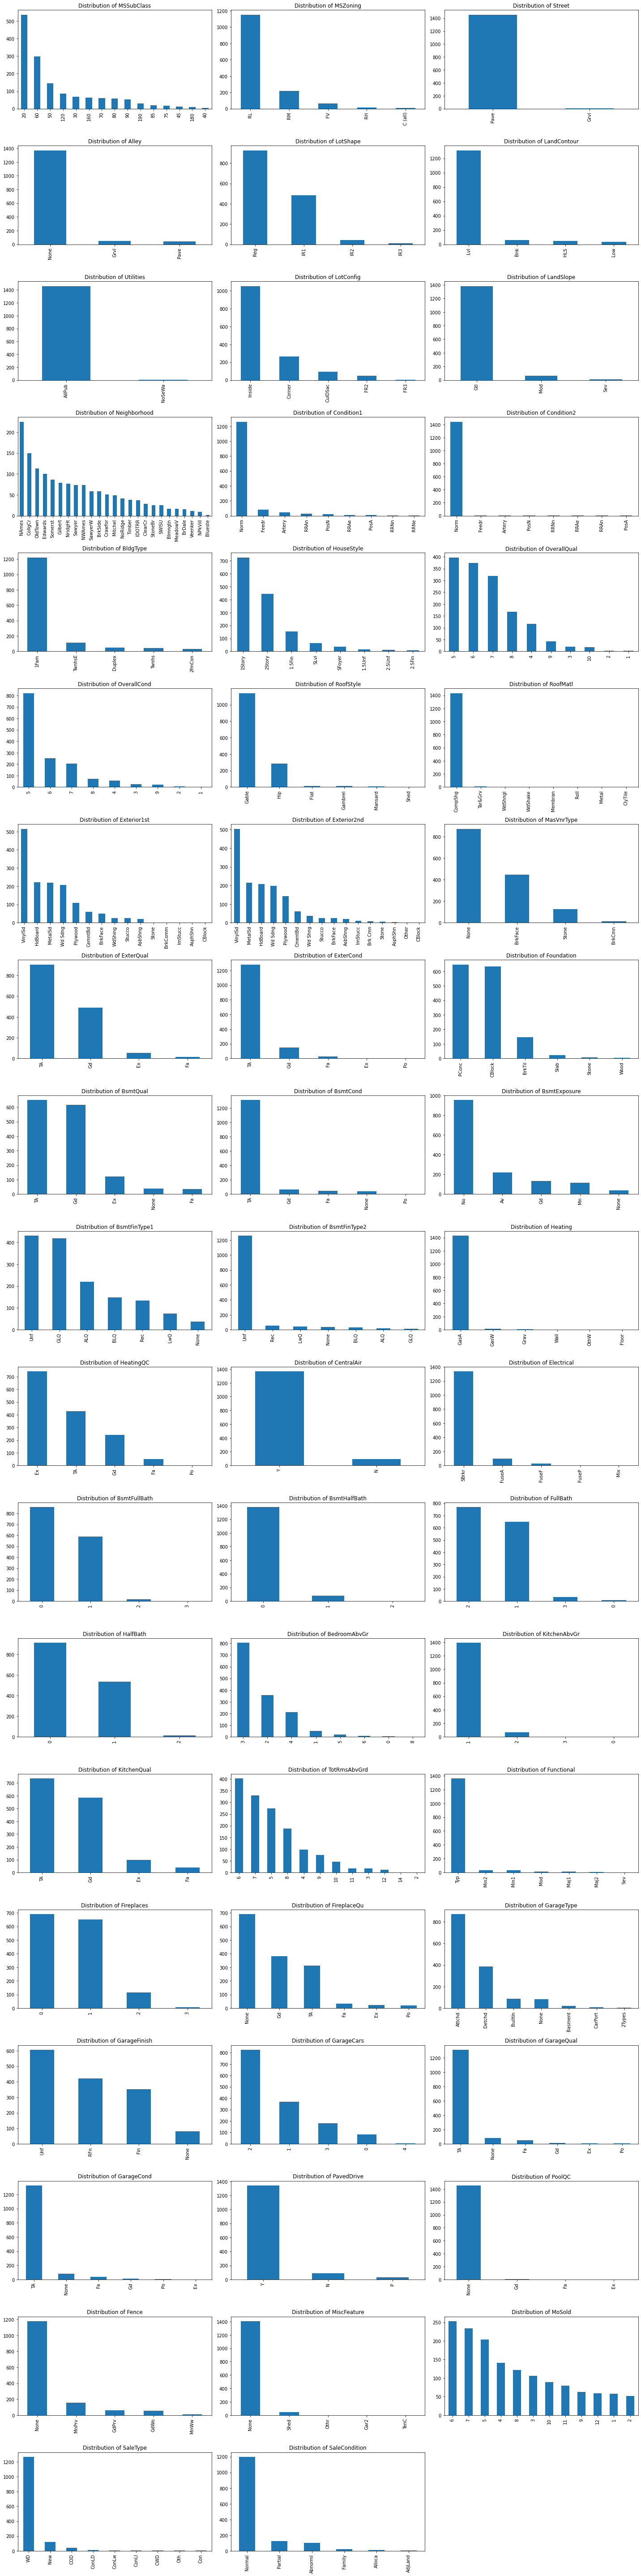

In [74]:
#distplot of all the categorical columns

row=19
col=3
i=0
plt.figure(figsize=[20,80])

for feature in categorical_columns:
    i+=1
    plt.subplot(row,col,i)
    plt.title("Distribution of "+feature)
    df[feature].value_counts().plot(kind='bar')
plt.tight_layout()

In [75]:
for feature in categorical_columns:
    print(feature)
    print(df[feature].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dt

In [76]:
#Dropping the columns having one category value >95%
df=df.drop(['Street','Utilities','Condition2','RoofMatl','Heating','KitchenAbvGr','PoolQC','MiscFeature'],axis=1)
df.shape

(1460, 72)

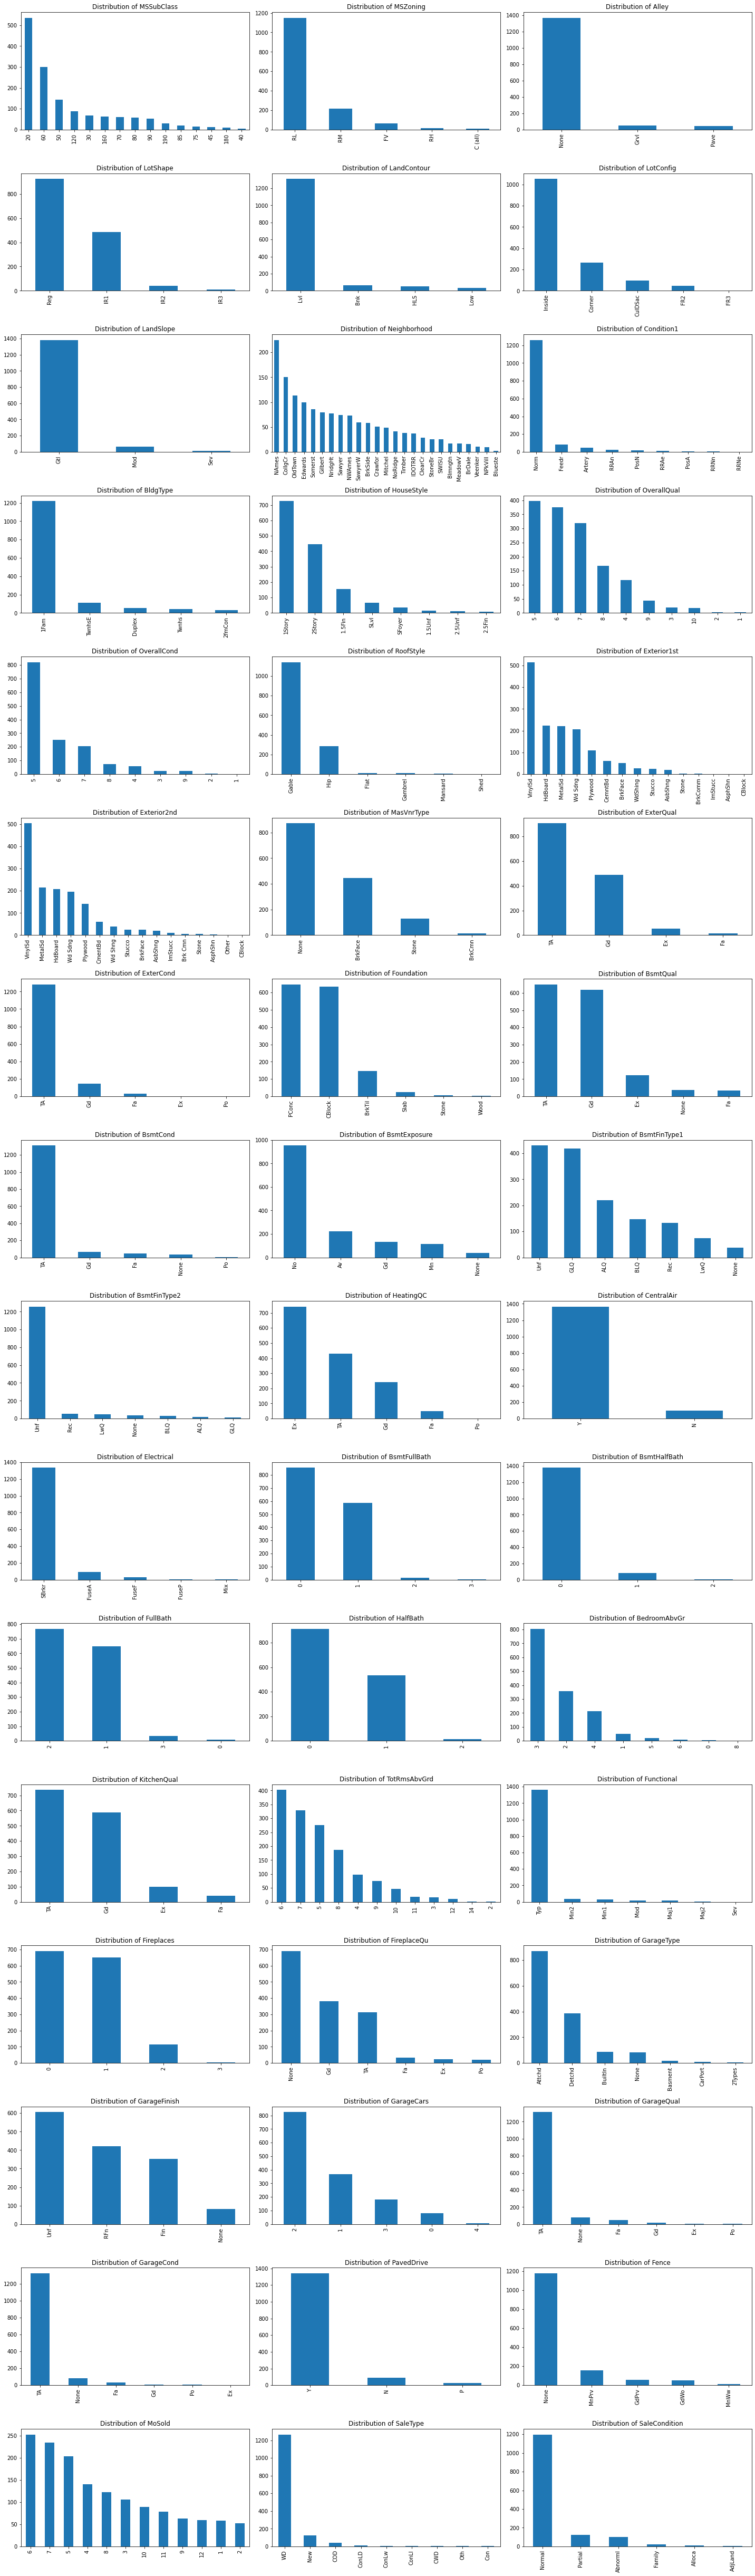

In [77]:
categorical_columns= df.select_dtypes(include=['object'])
categorical_columns.columns

row=19
col=3
i=0
plt.figure(figsize=[20,80])

for feature in categorical_columns:
    i+=1
    plt.subplot(row,col,i)
    plt.title("Distribution of "+feature)
    df[feature].value_counts().plot(kind='bar')
plt.tight_layout()

In [78]:
#Checking for numerical columns now
df.describe(percentiles=[.25,.40,.45,.5,.55,.59,.6,.65,.7,.75,.90,.95,.96,.98,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeProperty,AgeRemodelled,AgeSold,AgeGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,49.732192,36.134247,13.184247,41.023973
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,1.328095,24.749688
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,11.000000,11.000000,11.000000,11.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,21.000000,17.000000,12.000000,18.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,0.000000,1339.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147000.000000,37.000000,23.000000,13.000000,26.000000
45%,69.000000,9100.000000,0.000000,312.000000,0.000000,419.100000,946.650000,1048.000000,0.000000,0.000000,1392.550000,456.000000,0.000000,6.200000,0.000000,0.000000,0.000000,0.000000,0.000000,155000.000000,44.000000,25.000000,13.000000,30.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,48.000000,27.000000,13.000000,36.500000
55%,69.000000,9794.500000,0.000000,450.000000,0.000000,544.000000,1040.000000,1132.450000,0.000000,0.000000,1509.450000,490.000000,63.450000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172500.000000,52.000000,32.000000,13.000000,43.000000
59%,70.000000,10140.000000,0.000000,510.000000,0.000000,598.000000,1078.000000,1166.810000,406.000000,0.000000,1571.000000,508.810000,100.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,177905.000000,55.000000,40.000000,14.000000,45.000000


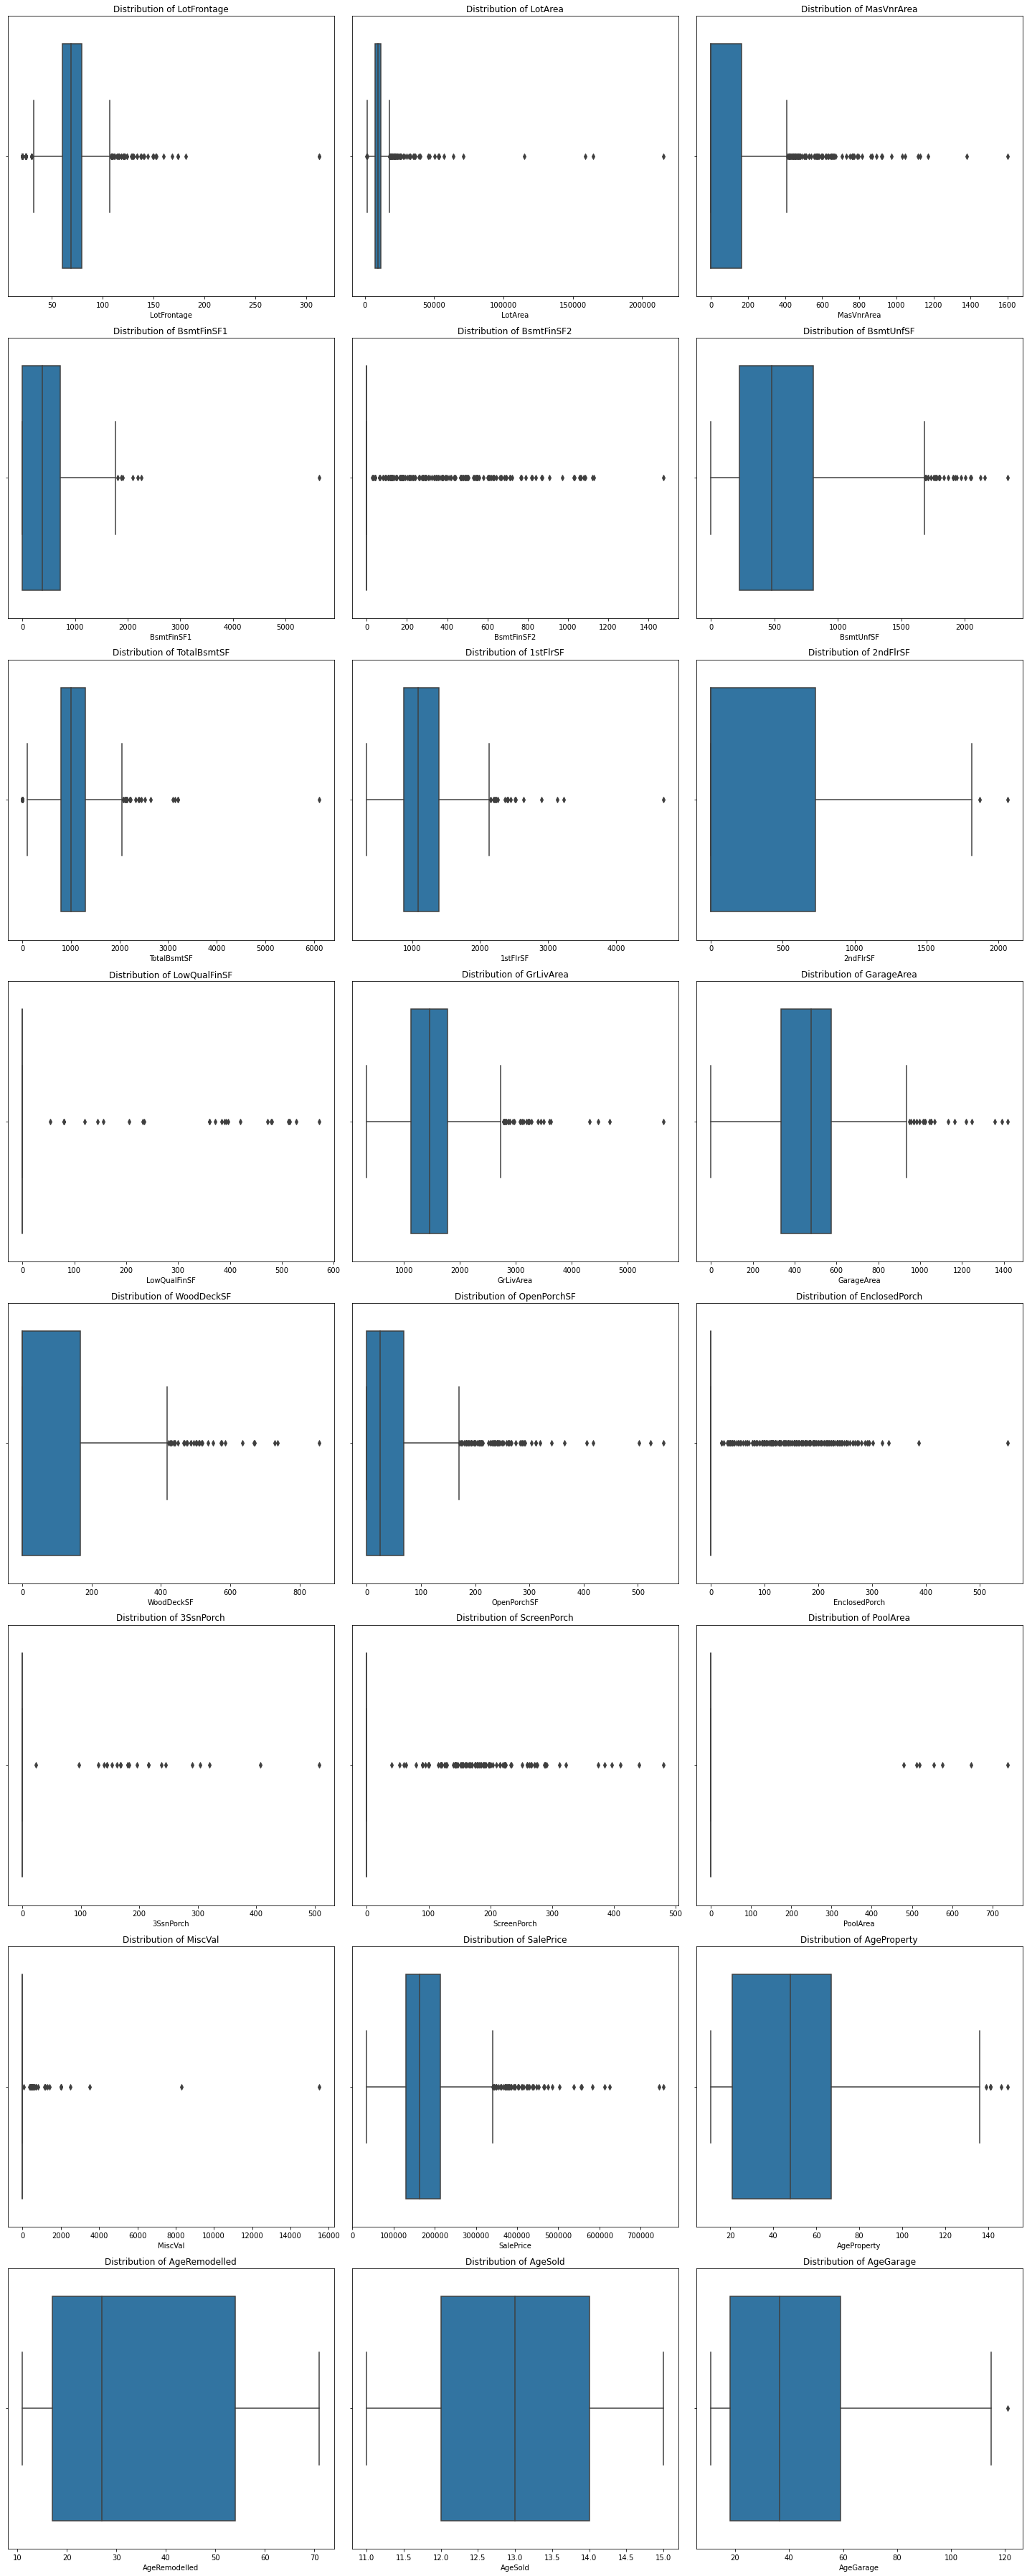

In [79]:
#Boxplot for numnerical features
row=8
col=3
i=0
plt.figure(figsize=[20,50])
for feature in continuous_columns:
    i+=1
    plt.subplot(row,col,i)
    plt.title("Distribution of "+feature)
    sns.boxplot(df[feature])
plt.tight_layout()

## Outlier detected

In [80]:
#Treatment of outliers

In [81]:
cap_value=df['LotArea'].quantile(.95)
df['LotArea'][df['LotArea']>cap_value]=cap_value

In [82]:
cap_value=df['MasVnrArea'].quantile(.95)
df['MasVnrArea'][df['MasVnrArea']>cap_value]=cap_value

In [83]:
cap_value=df['BsmtFinSF1'].quantile(.99)
df['BsmtFinSF1'][df['BsmtFinSF1']>cap_value]=cap_value

In [84]:
cap_value=df['BsmtUnfSF'].quantile(.98)
df['BsmtUnfSF'][df['BsmtUnfSF']>cap_value]=cap_value

In [85]:
cap_value=df['TotalBsmtSF'].quantile(.98)
df['TotalBsmtSF'][df['TotalBsmtSF']>cap_value]=cap_value

In [86]:
cap_value=df['GrLivArea'].quantile(.98)
df['GrLivArea'][df['GrLivArea']>cap_value]=cap_value

In [87]:
cap_value=df['GarageArea'].quantile(.98)
df['GarageArea'][df['GarageArea']>cap_value]=cap_value

In [88]:
cap_value=df['WoodDeckSF'].quantile(.98)
df['WoodDeckSF'][df['WoodDeckSF']>cap_value]=cap_value

In [89]:
cap_value=df['OpenPorchSF'].quantile(.98)
df['OpenPorchSF'][df['OpenPorchSF']>cap_value]=cap_value

In [90]:
#Dropping the following attributes because they do not have significant values

df=df.drop(['LowQualFinSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','BsmtFinSF2'],axis=1)
df.shape

(1460, 66)

In [91]:
df=df.drop(['ScreenPorch'],axis=1)
df.shape

(1460, 65)

In [92]:
continuous_columns=df.select_dtypes(include=['int64','float64'])
continuous_columns.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'AgeProperty',
       'AgeRemodelled', 'AgeSold', 'AgeGarage'],
      dtype='object')

In [93]:
categorical_columns= df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

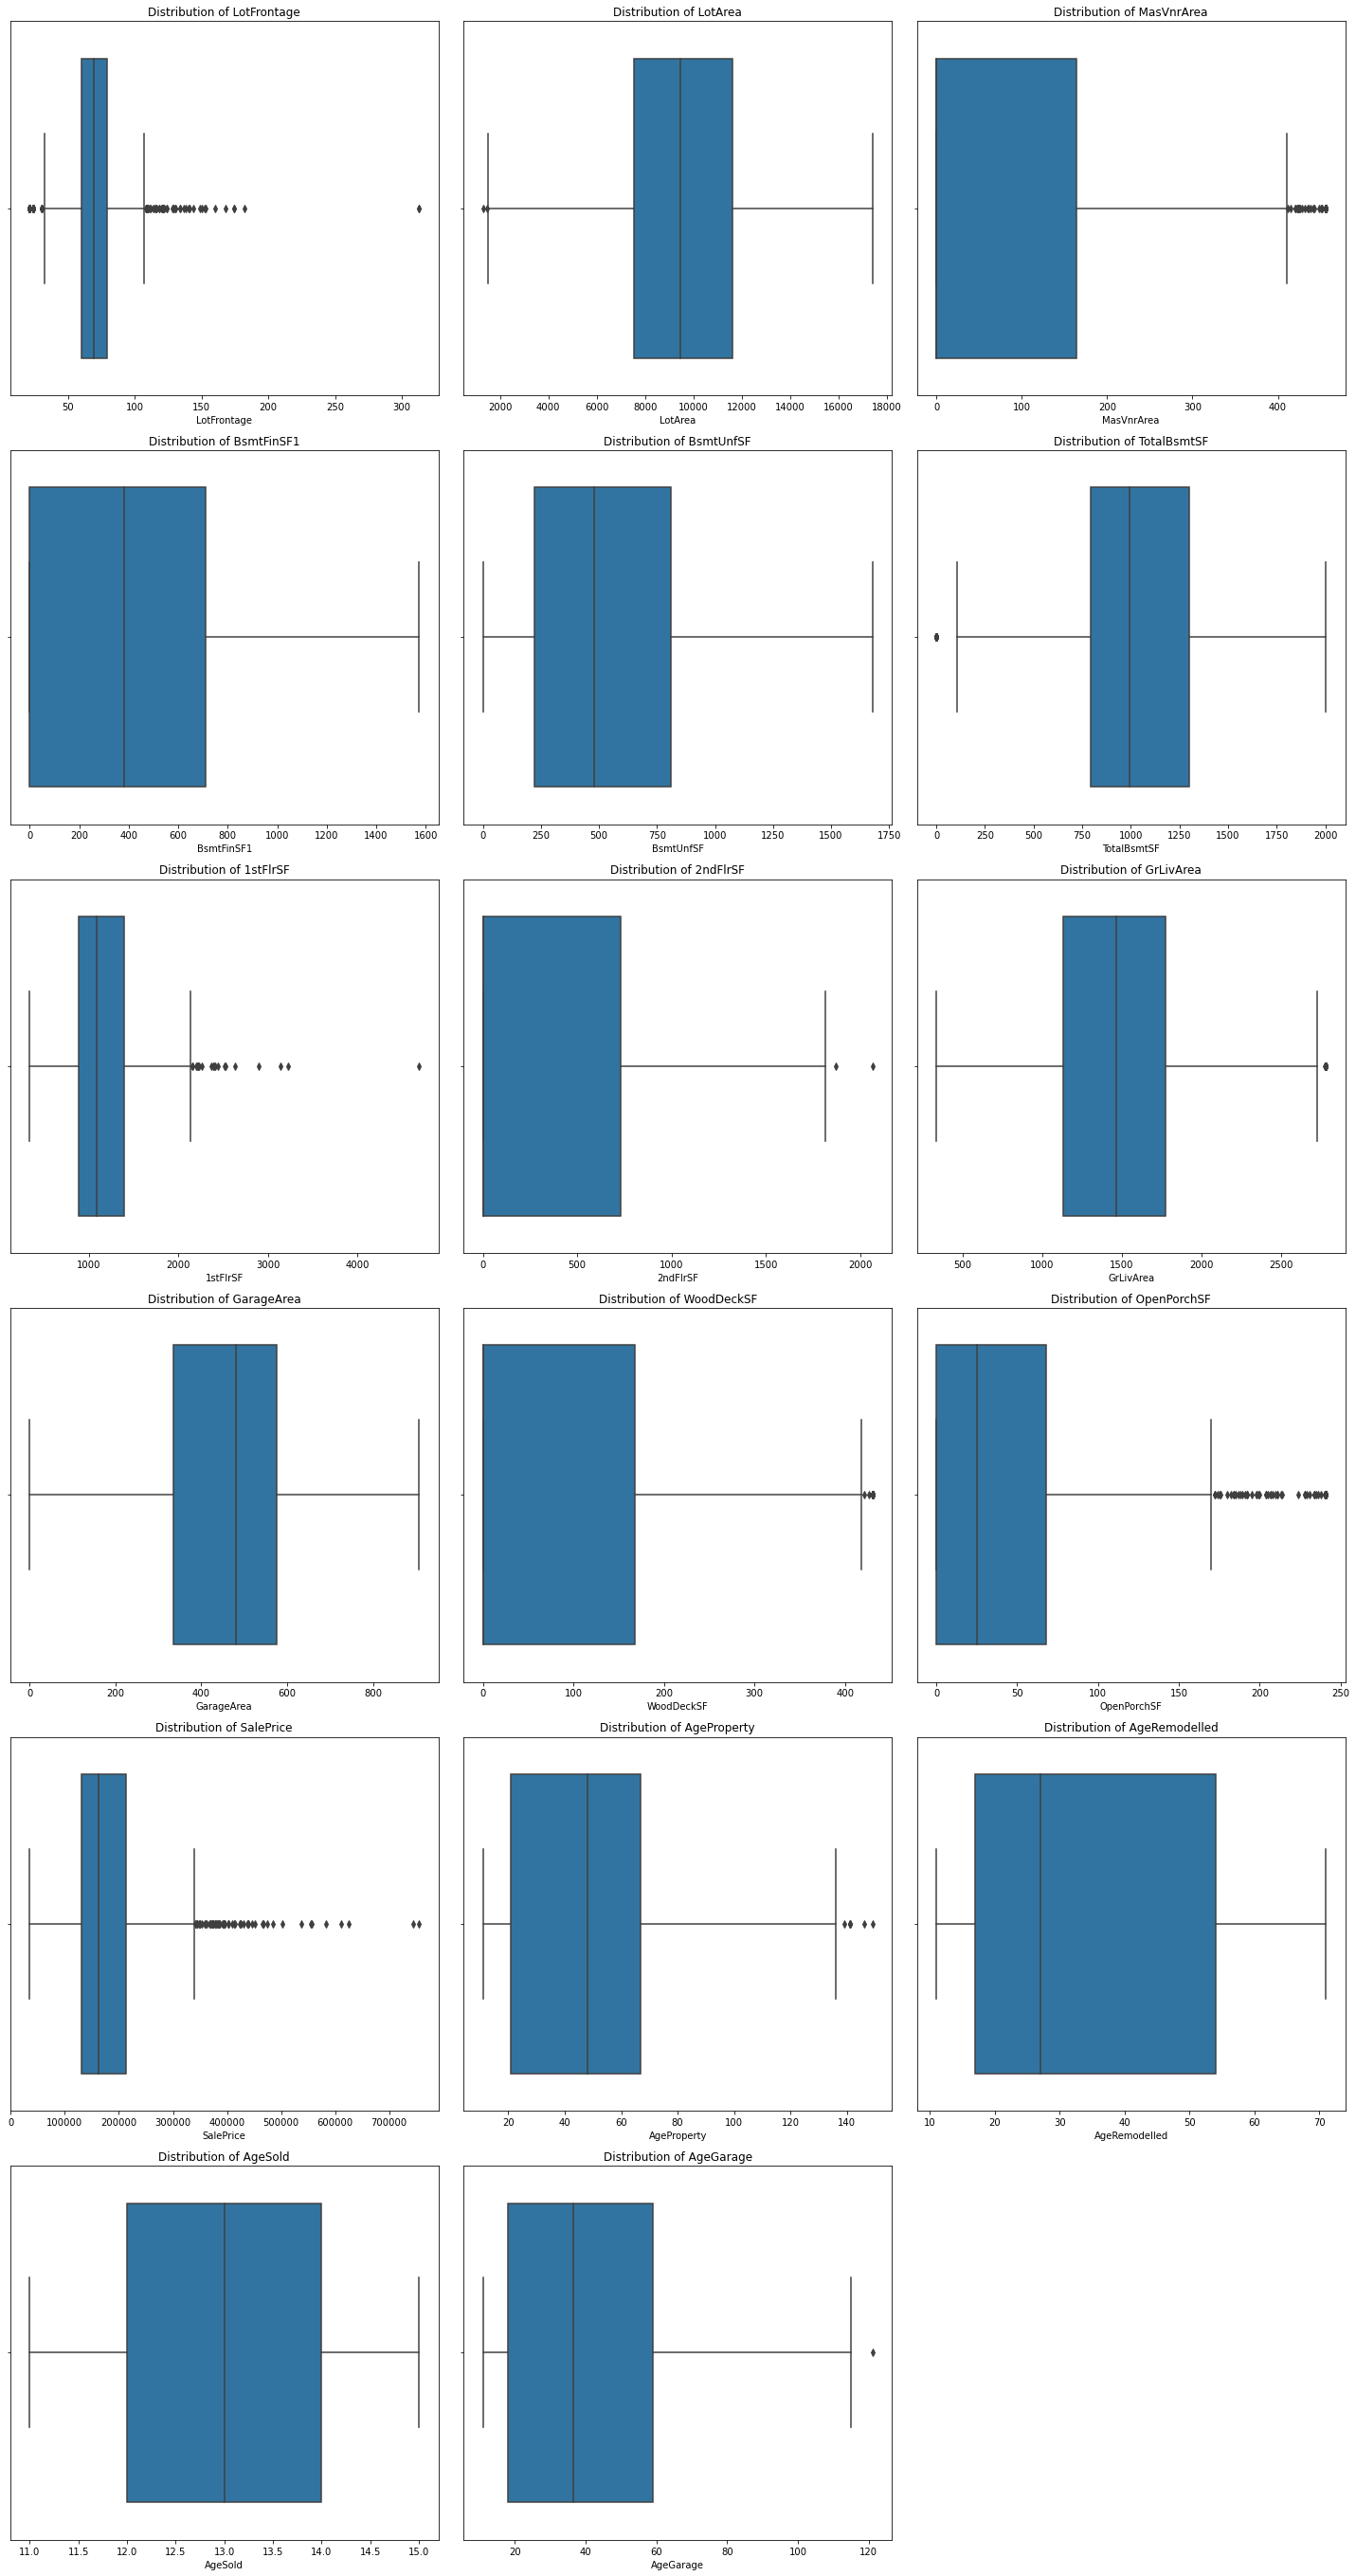

In [94]:
#Plotting the boxplot again after imputation
row=8
col=3
i=0
plt.figure(figsize=[20,50])
for feature in continuous_columns:
    i+=1
    plt.subplot(row,col,i)
    plt.title("Distribution of "+feature)
    sns.boxplot(df[feature])
plt.tight_layout()

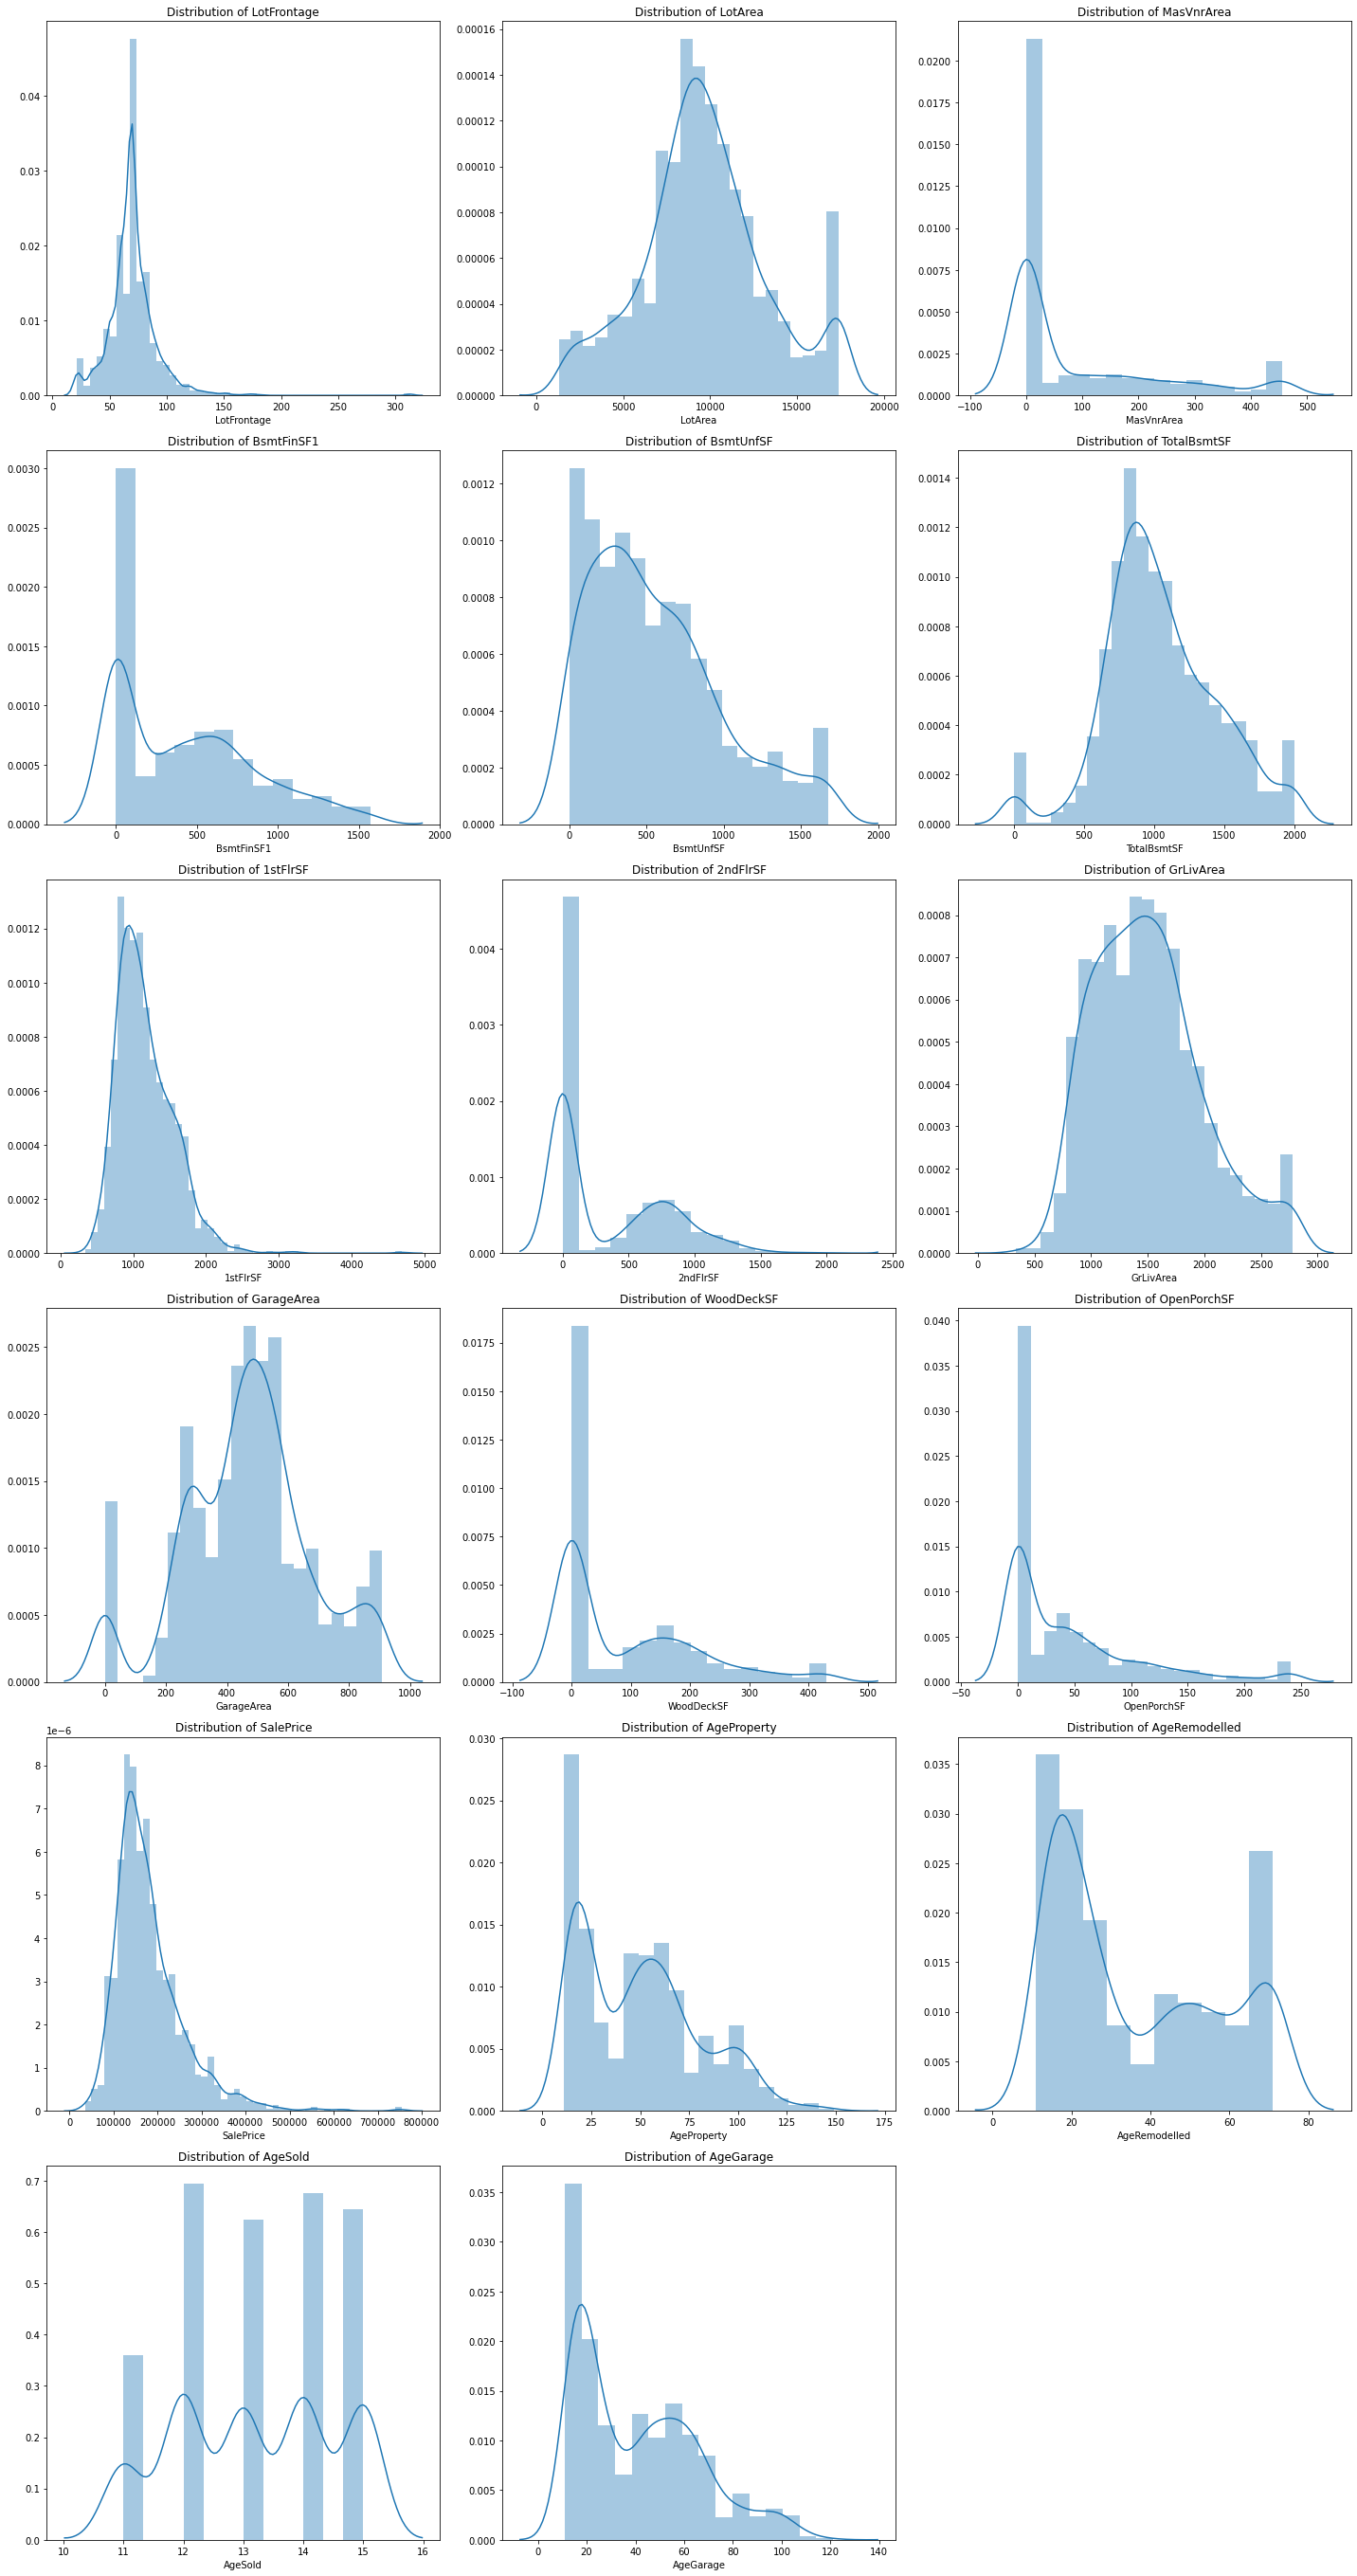

In [95]:
#Distribution plots also for continuous features
row=8
col=3
i=0
plt.figure(figsize=[20,50])
for feature in continuous_columns:
    i+=1
    plt.subplot(row,col,i)
    plt.title("Distribution of "+feature)
    sns.distplot(df[feature])
plt.tight_layout()

# Bivariate Analysis

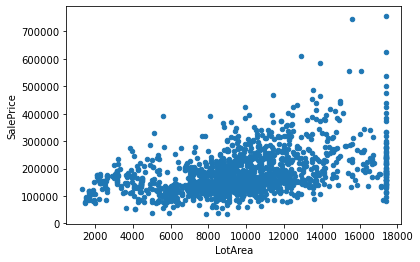

In [96]:
#Scatter plots for some of the features to check the distribution
df.plot.scatter(x='LotArea',y='SalePrice')

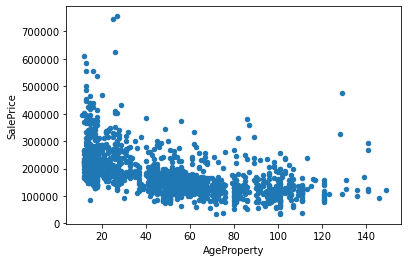

In [97]:
df.plot.scatter(x='AgeProperty',y='SalePrice')

<Figure size 720x360 with 0 Axes>

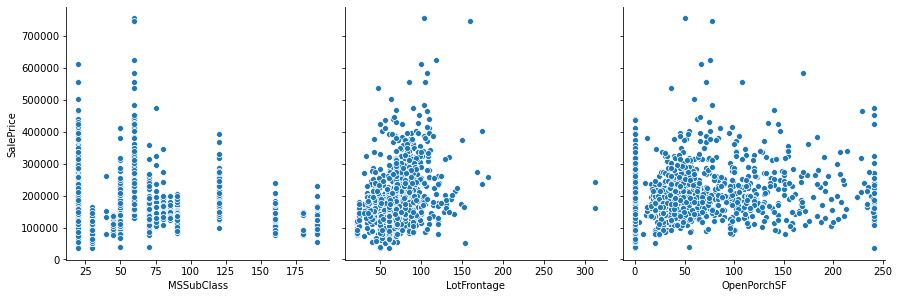

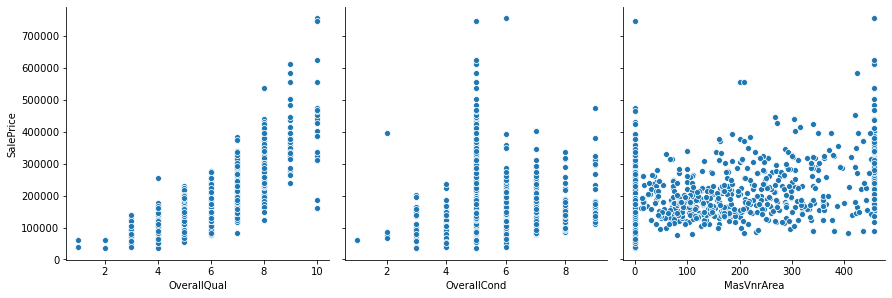

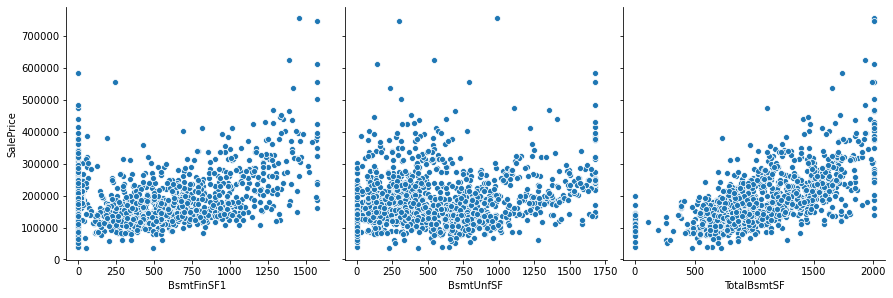

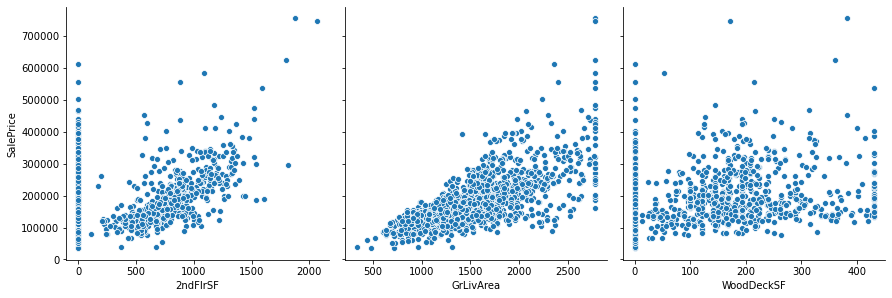

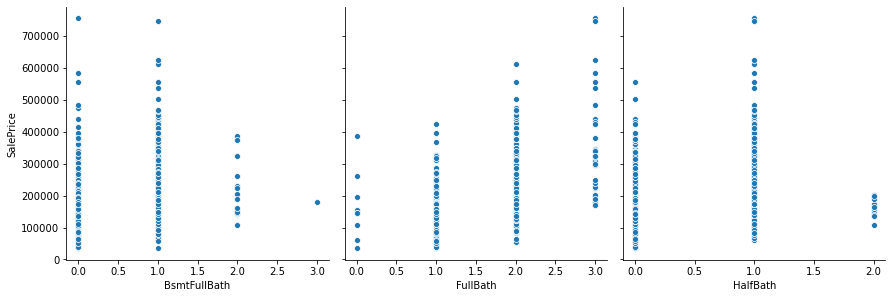

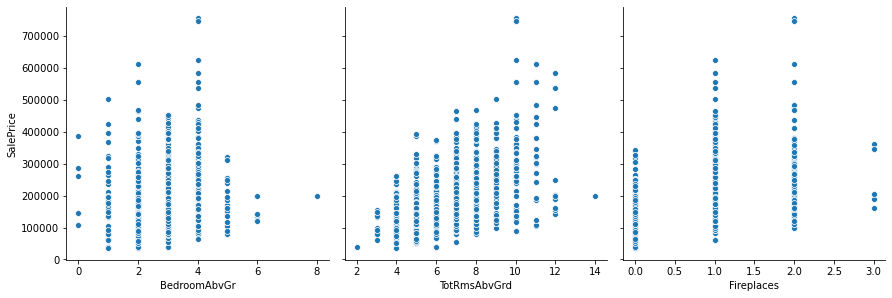

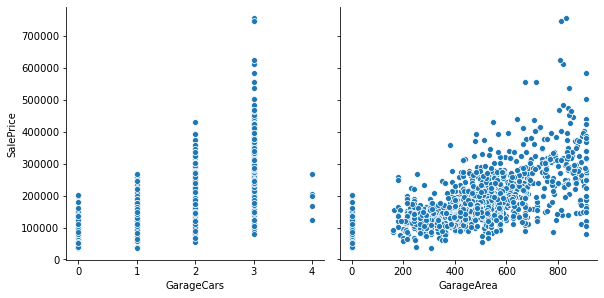

In [98]:
#Pair plot to check the relation between the features
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['2ndFlrSF', 'GrLivArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

### No direct relation can be seen from the graphs 

### Co-realtion matrix for finding co-linearity between features

In [99]:
#co-relation matrix
corrmat=df.corr()
corrmat

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProperty,AgeRemodelled,AgeSold,AgeGarage
LotFrontage,1.000000,0.558162,0.169229,0.147369,0.118963,0.302828,0.413773,0.072388,0.325586,0.309062,0.081236,0.139016,0.334771,-0.116685,-0.083348,-0.006380,-0.038892
LotArea,0.558162,1.000000,0.147185,0.212409,0.087774,0.359329,0.454121,0.121920,0.434532,0.344991,0.198445,0.163080,0.432993,-0.067082,-0.055334,0.036711,0.020197
MasVnrArea,0.169229,0.147185,1.000000,0.245098,0.108554,0.354042,0.336363,0.146669,0.363948,0.382176,0.162884,0.158313,0.452987,-0.341795,-0.185254,-0.002819,-0.222369
BsmtFinSF1,0.147369,0.212409,0.245098,1.000000,-0.528801,0.462401,0.397017,-0.158230,0.134340,0.275953,0.208609,0.089493,0.394340,-0.252186,-0.125052,-0.014157,-0.115031
BsmtUnfSF,0.118963,0.087774,0.108554,-0.528801,1.000000,0.428116,0.305848,0.008726,0.245676,0.178120,-0.010065,0.136600,0.202923,-0.143985,-0.178165,0.042805,-0.168222
TotalBsmtSF,0.302828,0.359329,0.354042,0.462401,0.428116,1.000000,0.783955,-0.203086,0.401355,0.483702,0.241261,0.240359,0.632933,-0.408644,-0.302377,0.019198,-0.270233
1stFlrSF,0.413773,0.454121,0.336363,0.397017,0.305848,0.783955,1.000000,-0.202646,0.530073,0.478034,0.236445,0.212990,0.605852,-0.281986,-0.240379,0.013604,-0.182240
2ndFlrSF,0.072388,0.121920,0.146669,-0.158230,0.008726,-0.203086,-0.202646,1.000000,0.691564,0.141380,0.090412,0.210906,0.319334,-0.010308,-0.140024,0.028700,-0.052291
GrLivArea,0.325586,0.434532,0.363948,0.134340,0.245676,0.401355,0.530073,0.691564,1.000000,0.470958,0.243640,0.335168,0.709055,-0.211910,-0.296425,0.034679,-0.179656
GarageArea,0.309062,0.344991,0.382176,0.275953,0.178120,0.483702,0.478034,0.141380,0.470958,1.000000,0.232395,0.259430,0.630116,-0.488272,-0.378139,0.029341,-0.332220


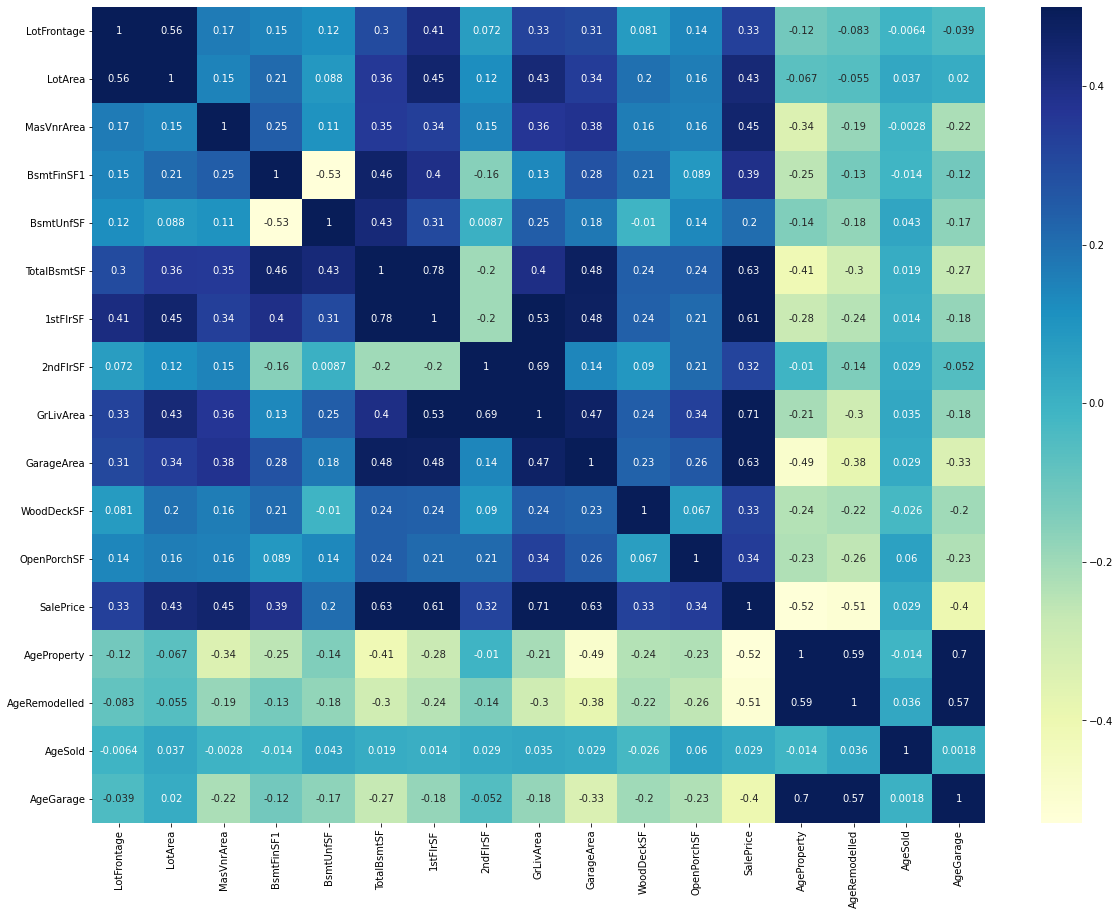

In [100]:
#Heatmap for visual aid
plt.figure(figsize=(20,15))
sns.heatmap(corrmat,cmap="YlGnBu",vmax=0.5,annot=True)

In [101]:
#Only 1stFlrSF is highly co-related with TotalBsmtSF  78%. No other feature seems to be co-related
df=df.drop(['1stFlrSF'],axis=1)
df.shape

(1460, 64)

In [102]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleType,SaleCondition,SalePrice,AgeProperty,AgeRemodelled,AgeSold,AgeGarage
0,60,RL,65.0,8450.0,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,Ex,Y,SBrkr,854,1710.0,1,0,2,1,3,Gd,8,Typ,0,None,Attchd,RFn,2,548.0,TA,TA,Y,0.0,61.0,None,2,WD,Normal,208500,18,18,13,18.0
1,20,RL,80.0,9600.0,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,Ex,Y,SBrkr,0,1262.0,0,1,2,0,3,TA,6,Typ,1,TA,Attchd,RFn,2,460.0,TA,TA,Y,298.0,0.0,None,5,WD,Normal,181500,45,45,14,45.0
2,60,RL,68.0,11250.0,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,Ex,Y,SBrkr,866,1786.0,1,0,2,1,3,Gd,6,Typ,1,TA,Attchd,RFn,2,608.0,TA,TA,Y,0.0,42.0,None,9,WD,Normal,223500,20,19,13,20.0
3,70,RL,60.0,9550.0,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,Gd,Y,SBrkr,756,1717.0,1,0,1,0,3,Gd,7,Typ,1,Gd,Detchd,Unf,3,642.0,TA,TA,Y,0.0,35.0,None,2,WD,Abnorml,140000,106,51,15,23.0
4,60,RL,84.0,14260.0,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,Ex,Y,SBrkr,1053,2198.0,1,0,2,1,4,Gd,9,Typ,1,TA,Attchd,RFn,3,836.0,TA,TA,Y,192.0,84.0,None,12,WD,Normal,250000,21,21,13,21.0


In [103]:
for c in df.columns:
    print(c,': ',df[c].isnull().values.any())

MSSubClass :  False
MSZoning :  False
LotFrontage :  False
LotArea :  False
Alley :  False
LotShape :  False
LandContour :  False
LotConfig :  False
LandSlope :  False
Neighborhood :  False
Condition1 :  False
BldgType :  False
HouseStyle :  False
OverallQual :  False
OverallCond :  False
RoofStyle :  False
Exterior1st :  False
Exterior2nd :  False
MasVnrType :  False
MasVnrArea :  False
ExterQual :  False
ExterCond :  False
Foundation :  False
BsmtQual :  False
BsmtCond :  False
BsmtExposure :  False
BsmtFinType1 :  False
BsmtFinSF1 :  False
BsmtFinType2 :  False
BsmtUnfSF :  False
TotalBsmtSF :  False
HeatingQC :  False
CentralAir :  False
Electrical :  False
2ndFlrSF :  False
GrLivArea :  False
BsmtFullBath :  False
BsmtHalfBath :  False
FullBath :  False
HalfBath :  False
BedroomAbvGr :  False
KitchenQual :  False
TotRmsAbvGrd :  False
Functional :  False
Fireplaces :  False
FireplaceQu :  False
GarageType :  False
GarageFinish :  False
GarageCars :  False
GarageArea :  False
Garag

# Data Preparation
#### Label encoding for ordered categorical features
#### Creating Dummies for other features

In [104]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value

df['LotShape']=df['LotShape'].map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
df['LandContour']=df['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df['LandSlope']=df['LandSlope'].map({'Sev':0,'Mod':1,'Gtl':2})
df['ExterQual']=df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond']=df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual']=df['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond']=df['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure']=df['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1']=df['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2']=df['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC']=df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir']=df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual']=df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu']=df['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageFinish']=df['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual']=df['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond']=df['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


In [105]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleType,SaleCondition,SalePrice,AgeProperty,AgeRemodelled,AgeSold,AgeGarage
0,60,RL,65.0,8450.0,None,3,3,Inside,2,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,150.0,856.0,4,1,SBrkr,854,1710.0,1,0,2,1,3,3,8,Typ,0,0,Attchd,2,2,548.0,3,3,Y,0.0,61.0,None,2,WD,Normal,208500,18,18,13,18.0
1,20,RL,80.0,9600.0,None,3,3,FR2,2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978.0,1,284.0,1262.0,4,1,SBrkr,0,1262.0,0,1,2,0,3,2,6,Typ,1,3,Attchd,2,2,460.0,3,3,Y,298.0,0.0,None,5,WD,Normal,181500,45,45,14,45.0
2,60,RL,68.0,11250.0,None,2,3,Inside,2,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486.0,1,434.0,920.0,4,1,SBrkr,866,1786.0,1,0,2,1,3,3,6,Typ,1,3,Attchd,2,2,608.0,3,3,Y,0.0,42.0,None,9,WD,Normal,223500,20,19,13,20.0
3,70,RL,60.0,9550.0,None,2,3,Corner,2,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216.0,1,540.0,756.0,3,1,SBrkr,756,1717.0,1,0,1,0,3,3,7,Typ,1,4,Detchd,1,3,642.0,3,3,Y,0.0,35.0,None,2,WD,Abnorml,140000,106,51,15,23.0
4,60,RL,84.0,14260.0,None,2,3,FR2,2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655.0,1,490.0,1145.0,4,1,SBrkr,1053,2198.0,1,0,2,1,4,3,9,Typ,1,3,Attchd,2,3,836.0,3,3,Y,192.0,84.0,None,12,WD,Normal,250000,21,21,13,21.0


In [106]:

# For values which cannot be ordered, get dummies

dummy_col = pd.get_dummies(df[['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',  'BldgType', 
                               'HouseStyle', 'RoofStyle',  'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
                               'Electrical', 'Functional','GarageType', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'
                              ]])
df=pd.concat([df,dummy_col],axis=1)
df=df.drop(['MSZoning',  'Alley', 'LotConfig', 'Neighborhood', 'Condition1',  'BldgType', 
                               'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
                               'Electrical', 'Functional','GarageType', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],axis=1)

In [107]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,2,7,5,196.0,3,2,4,3,1,6,706.0,1,150.0,856.0,4,1,854,1710.0,1,0,2,1,3,3,8,0,0,2,2,548.0,3,3,0.0,61.0,2,208500,18,18,13,18.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,3,3,2,6,8,0.0,2,2,4,3,4,5,978.0,1,284.0,1262.0,4,1,0,1262.0,0,1,2,0,3,2,6,1,3,2,2,460.0,3,3,298.0,0.0,5,181500,45,45,14,45.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,2,

In [108]:
df.shape

(1460, 194)

In [109]:
get_info(df)

,Total Element,Datatype,Null Count,Null Percentage
MSSubClass,1460,object,0,0.0
LotFrontage,1460,float64,0,0.0
LotArea,1460,float64,0,0.0
LotShape,1460,int64,0,0.0
LandContour,1460,int64,0,0.0
LandSlope,1460,int64,0,0.0
OverallQual,1460,object,0,0.0
OverallCond,1460,object,0,0.0
MasVnrArea,1460,float64,0,0.0
ExterQual,1460,int64,0,0.0


In [110]:
#Cnverting the object type features back to numeric for data modelling
cols=df.select_dtypes(include=['object'])
cols

for feature in cols.columns:
    df[feature]=df[feature].astype('int64')
get_info(df)

,Total Element,Datatype,Null Count,Null Percentage
MSSubClass,1460,int64,0,0.0
LotFrontage,1460,float64,0,0.0
LotArea,1460,float64,0,0.0
LotShape,1460,int64,0,0.0
LandContour,1460,int64,0,0.0
LandSlope,1460,int64,0,0.0
OverallQual,1460,int64,0,0.0
OverallCond,1460,int64,0,0.0
MasVnrArea,1460,float64,0,0.0
ExterQual,1460,int64,0,0.0


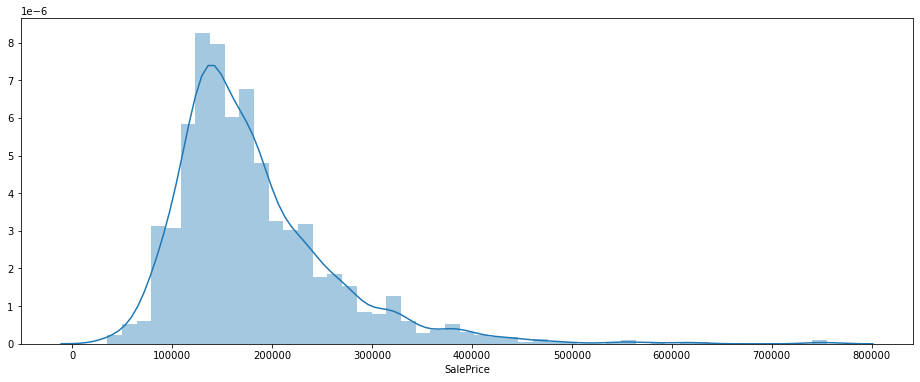

In [111]:
#The target variable was skewed hence transforming it to remove skewness
#Let us check the distribution of our target variable before scaling and Splitting
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

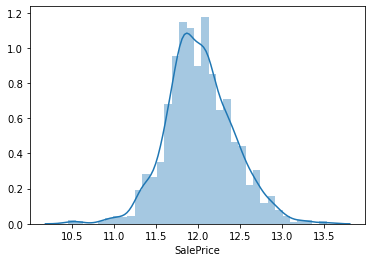

In [112]:
sns.distplot(np.log(df['SalePrice']))

## This seems to have normalized the target variable

In [113]:
#Transformed target variable
df['TransformedSalePrice']=np.log(df.SalePrice)

In [114]:
df[['SalePrice','TransformedSalePrice']].describe()

,SalePrice,TransformedSalePrice
count,1460.000000,1460.000000
mean,180921.195890,12.024051
std,79442.502883,0.399452
min,34900.000000,10.460242
25%,129975.000000,11.775097
50%,163000.000000,12.001505
75%,214000.000000,12.273731
max,755000.000000,13.534473


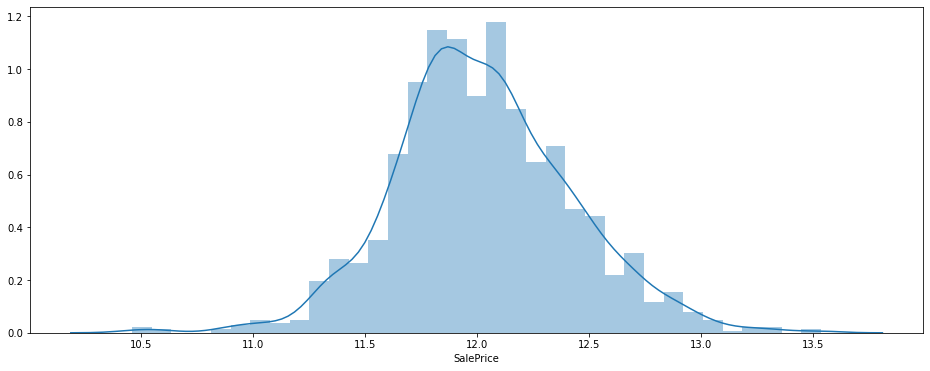

In [115]:
#since the Target variable has all positive values, we did go for log transform.
#Standardising the target variable and storing it in y
y = np.log(df.SalePrice)
plt.figure(figsize=(16,6))
sns.distplot(y)
plt.show()

# Test Train Split

In [116]:
X = df.drop(['SalePrice','TransformedSalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,2,7,5,196.0,3,2,4,3,1,6,706.0,1,150.0,856.0,4,1,854,1710.0,1,0,2,1,3,3,8,0,0,2,2,548.0,3,3,0.0,61.0,2,18,18,13,18.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,3,3,2,6,8,0.0,2,2,4,3,4,5,978.0,1,284.0,1262.0,4,1,0,1262.0,0,1,2,0,3,2,6,1,3,2,2,460.0,3,3,298.0,0.0,5,45,45,14,45.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,2,3,2,7,5,162.0,3,2,4,3,2,

In [239]:
#already put the target variable in y during Standardising
#y=df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [241]:
X_train.shape

(1022, 193)

In [242]:
X_test.shape

(438, 193)

In [243]:
y_train.shape

(1022,)

In [244]:
y_test.shape

(438,)

## Scaling the features

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
ss=StandardScaler()

In [247]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604.0,3,3,2,5,6,0.0,2,2,3,3,1,3,468.0,1,396.0,864.0,2,0,0,864.0,1,0,1,0,2,2,5,0,0,0,0,0.0,0,0,0.0,0.0,4,96,71,13,16.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
318,60,90.0,9900.0,3,0,1,7,5,256.0,3,2,4,3,4,6,987.0,1,360.0,1347.0,4,1,1274,2646.0,1,0,2,1,4,3,9,1,3,2,3,656.0,3,3,340.0,60.0,4,28,28,12,28.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
239,50,52.0,8741.0,3,3,2,6,4,0.0,2,2,3,2,1

In [248]:

cols=X_train.select_dtypes(include=['int64','float64']).columns
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'AgeProperty', 'AgeRemodelled', 'AgeSold', 'AgeGarage'],
      dtype='object')

In [249]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,30,67.0,5604.0,3,3,2,5,6,0.0,2,2,3,3,1,3,468.0,1,396.0,864.0,2,0,0,864.0,1,0,1,0,2,2,5,0,0,0,0,0.0,0,0,0.0,0.0,4,96,71,13,16.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
318,60,90.0,9900.0,3,0,1,7,5,256.0,3,2,4,3,4,6,987.0,1,360.0,1347.0,4,1,1274,2646.0,1,0,2,1,4,3,9,1,3,2,3,656.0,3,3,340.0,60.0,4,28,28,12,28.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
239,50,52.0,8741.0,3,3,2,6,4,0.0,2,2,3,2,1

In [250]:
X_train[cols]=ss.fit_transform(X_train[cols])
X_test[cols]=ss.transform(X_test[cols])



In [251]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657427,-0.116296,-1.123272,0.693602,0.310922,0.228353,-0.780717,0.383810,-0.649872,-0.699254,-0.260680,-0.532966,0.123878,-0.606678,-0.280632,0.060823,-0.278347,-0.374638,-0.457565,-1.180063,-3.579219,-0.788604,-1.336020,1.065748,-0.247663,-1.027046,-0.752739,-1.043384,-0.775454,-0.936623,-0.926310,-0.984405,-1.902195,-2.368148,-2.288192,-3.869188,-3.862126,-0.776175,-0.762862,-0.832488,1.525951,1.695468,-0.135294,-1.001731,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
318,0.035958,0.925887,0.085407,0.693602,-4.455513,-3.307661,0.649199,-0.532671,1.159584,1.052308,-0.260680,0.578649,0.123878,2.144910,1.139200,1.269109,-0.278347,-0.456929,0.73021

# Recursive Feature Elimination

In [252]:
lm=LinearRegression()

In [253]:
lm.fit(X_train,y_train)

LinearRegression()

In [254]:
print(lm.intercept_)
print(lm.coef_)

-11101258131.524975
[-1.13220405e-02 -1.54000986e-02  4.10097114e-02  8.67186421e-03
  5.97341267e-03 -8.35564216e-03  5.98057900e-02  4.32095740e-02
 -6.81413207e-03 -4.84549782e-03 -3.91543450e-03  8.56243910e-03
 -6.61164821e-03  1.41144220e-02  1.00171841e-02  1.08262769e-02
 -4.35226363e-03 -1.68566009e-02  6.69418080e-02  8.59577166e-03
  1.24820485e-02  2.69846066e-02  1.17104297e-01  1.47877686e-02
  1.64248596e-03  7.48499548e-03  4.84549614e-03  4.99940481e-03
  6.90769084e-03 -1.50188482e-03 -3.58803587e-03  1.96391078e-02
  8.03885899e-03  2.51510987e-02  1.84955870e-02  3.67206986e-02
 -1.58517247e-03  6.86048716e-03  4.21873646e-03 -6.99378102e-04
 -4.59934595e-02 -2.14924471e-02  3.30401764e-03  5.00407664e-03
  1.76028584e+09  1.76028584e+09  1.76028584e+09  1.76028584e+09
  1.76028584e+09 -3.54583112e+09 -3.54583112e+09 -3.54583112e+09
  9.61167848e+08  9.61167848e+08  9.61167848e+08  9.61167848e+08
  9.61167848e+08 -4.05041589e+08 -4.05041589e+08 -4.05041589e+08
 -4.0

In [255]:
#predicting the values for train and test
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
#r2 score for train data
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score for train data: ',r2_train_lr)
metric.append(r2_train_lr)

#r2 score for test data
r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score for test data: ',r2_test_lr)
metric.append(r2_test_lr)

#rss value for train data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss value for train data: ',rss1_lr)
metric.append(rss1_lr)

#rss value for test data
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss value for test data: ',rss2_lr)
metric.append(rss2_lr)

#mse for train data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse for train data: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

#mse for test data
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse for test data',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 score for train data:  0.9392518122673716
r2 score for test data:  -7.21368311661929e+17
rss value for train data:  9.763783253775344
rss value for test data:  5.198798341448485e+19
mse for train data:  0.009553603966512078
mse for test data 1.186940260604677e+17


In [256]:
from sklearn.feature_selection import RFE
rfe= RFE(lm,50)


In [257]:
rfe=rfe.fit(X_train,y_train)

In [258]:
rfe_scores= pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Feature','Status','Rank'])


In [259]:
rfe_scores.loc[rfe_scores['Status']==True]

,Feature,Status,Rank
49,Alley_Grvl,True,1
50,Alley_None,True,1
51,Alley_Pave,True,1
61,Neighborhood_ClearCr,True,1
63,Neighborhood_Crawfor,True,1
66,Neighborhood_IDOTRR,True,1
67,Neighborhood_MeadowV,True,1
72,Neighborhood_NoRidge,True,1
73,Neighborhood_NridgHt,True,1
78,Neighborhood_Somerst,True,1


In [260]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Feature)

#### Let's filter the train test set with selected columns

In [261]:
X_train_rfe=X_train[rfe_sel_columns]
X_test_rfe=X_test[rfe_sel_columns]

## Optimizing using Lasso Regression

In [262]:
from sklearn.linear_model import Ridge,Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [263]:
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]
}

In [264]:
lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [265]:
cv_results_lasso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022413,0.009335,0.006579,0.003320,0.0001,{'alpha': 0.0001},-0.166570,-0.182520,-0.178428,-0.167154,-0.179115,-0.174757,0.006596,2,-0.165641,-0.161467,-0.163956,-0.166216,-0.161090,-0.163674,0.002096
1,0.009596,0.003195,0.006394,0.003197,0.001,{'alpha': 0.001},-0.164961,-0.185143,-0.181481,-0.165414,-0.176777,-0.174755,0.008251,1,-0.168867,-0.164180,-0.165675,-0.168720,-0.164772,-0.166443,0.001978
2,0.009604,0.003198,0.003197,0.003916,0.01,{'alpha': 0.01},-0.198094,-0.221381,-0.206874,-0.190774,-0.218030,-0.207030,0.011585,3,-0.205803,-0.199584,-0.204017,-0.207341,-0.203207,-0.203991,0.002628
3,0.006404,0.003202,0.006395,0.003197,0.05,{'alpha': 0.05},-0.252417,-0.253718,-0.241365,-0.236060,-0.264917,-0.249695,0.010105,4,-0.249211,-0.245351,-0.249316,-0.249510,-0.247817,-0.248241,0.001565
4,0.007994,0.000002,0.001599,0.003199,0.1,{'alpha': 0.1},-0.305963,-0.307671,-0.301132,-0.287735,-0.320722,-0.304644,0.010655,5,-0.301399,-0.304313,-0.305981,-0.305832,-0.301917,-0.303888,0.001919


In [266]:
lasso_model_cv.best_params_

{'alpha': 0.001}

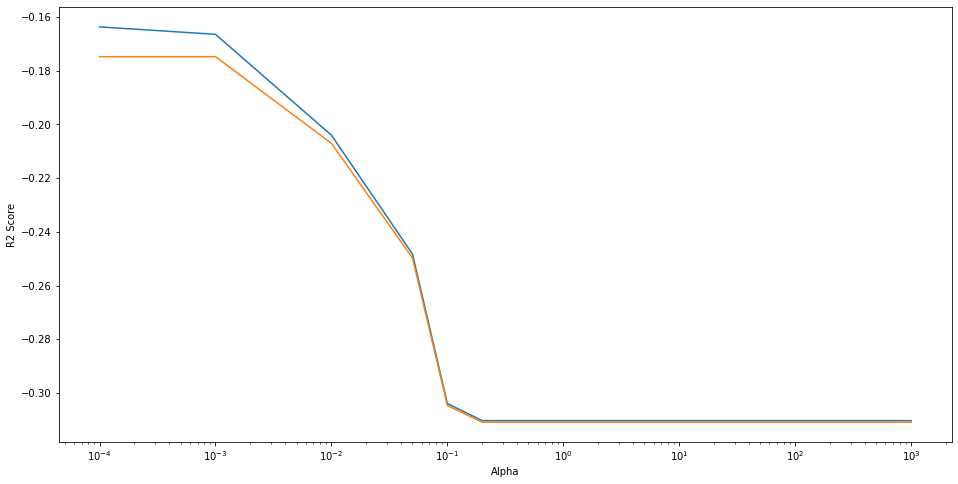

In [267]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [268]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_rfe,y_train)

Lasso(alpha=0.001)

In [269]:
y_train_pred_lasso = lasso.predict(X_train_rfe)
y_test_pred_lasso = lasso.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred_lasso))
print(r2_score(y_true=y_test,y_pred=y_test_pred_lasso))

0.680896248697705
0.6313540986677483


In [270]:
# lasso_try=Lasso(alpha=0.0005)
# lasso_try.fit(X_train_rfe,y_train)
# y_train_pred_lasso_try = lasso_try.predict(X_train_rfe)
# y_test_pred_lasso_try = lasso.predict(X_test_rfe)

# print(r2_score(y_true=y_train,y_pred=y_train_pred_lasso_try))
# print(r2_score(y_true=y_test,y_pred=y_test_pred_lasso_try))

In [271]:
lasso.coef_

array([-0.02120732,  0.        ,  0.03305324,  0.22246802,  0.2776648 ,
       -0.18625717, -0.21878285,  0.44557315,  0.36425085,  0.19985547,
        0.31186222,  0.22825451,  0.22421045,  0.04723099,  0.03337135,
        0.        ,  0.        , -0.24610152, -0.11834334,  0.06146215,
        0.06627702, -0.12036974, -0.        , -0.        ,  0.17751469,
       -0.        , -0.        , -0.        ,  0.10918528, -0.        ,
        0.05598015, -0.05499427,  0.09097889,  0.19841113,  0.        ,
        0.17550615,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.03177835,  0.        ,  0.15349599,
        0.        ,  0.21782655, -0.        , -0.03281735, -0.15486215])

In [272]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
7,Neighborhood_NoRidge,0.4456
8,Neighborhood_NridgHt,0.3643
10,Neighborhood_StoneBr,0.3119
4,Neighborhood_Crawfor,0.2777
11,Neighborhood_Timber,0.2283
12,Neighborhood_Veenker,0.2242
3,Neighborhood_ClearCr,0.2225
46,GarageType_BuiltIn,0.2178
9,Neighborhood_Somerst,0.1999
33,Foundation_PConc,0.1984


# Optimizing using Ridge regression

In [273]:
ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
ridge_model_cv.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [274]:
cv_results_ridge = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007994,0.000003,0.003199,0.003918,0.0001,{'alpha': 0.0001},-0.167024,-0.183062,-0.177657,-0.168215,-0.180324,-0.175257,0.006477,20,-0.165307,-0.161301,-0.163914,-0.165859,-0.160599,-0.163396,0.002107
1,0.008618,0.004165,0.006398,0.003199,0.001,{'alpha': 0.001},-0.167022,-0.183062,-0.177658,-0.168206,-0.180319,-0.175254,0.006478,19,-0.165307,-0.161301,-0.163914,-0.165860,-0.160600,-0.163396,0.002107
2,0.008048,0.000083,0.006356,0.003179,0.01,{'alpha': 0.01},-0.167003,-0.183061,-0.177672,-0.168115,-0.180274,-0.175225,0.006497,18,-0.165312,-0.161303,-0.163912,-0.165871,-0.160609,-0.163401,0.002107
3,0.007996,0.000002,0.003197,0.003916,0.05,{'alpha': 0.05},-0.166919,-0.183055,-0.177730,-0.167728,-0.180080,-0.175102,0.006577,17,-0.165333,-0.161313,-0.163907,-0.165913,-0.160648,-0.163423,0.002109
4,0.008001,0.000015,0.006395,0.003198,0.1,{'alpha': 0.1},-0.166816,-0.183050,-0.177798,-0.167279,-0.179927,-0.174974,0.006686,16,-0.165367,-0.161325,-0.163899,-0.165961,-0.160695,-0.163449,0.002111


In [275]:
ridge_model_cv.best_params_

{'alpha': 3.0}

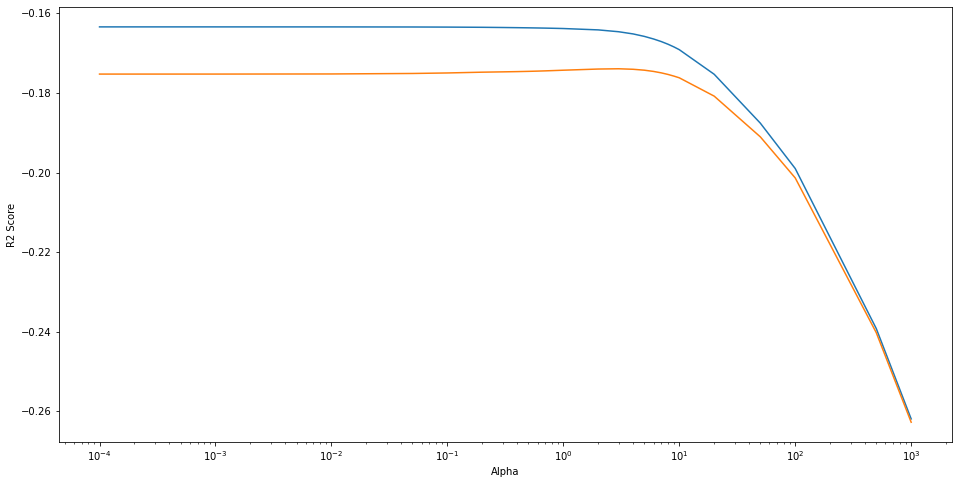

In [276]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [299]:
ridge = Ridge(alpha=3.0)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=3.0)

In [300]:
y_train_pred_ridge = ridge.predict(X_train_rfe)
y_test_pred_ridge = ridge.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred_ridge))
print(r2_score(y_true=y_test,y_pred=y_test_pred_ridge))

0.6914613566769086
0.6438394322117955


In [301]:
ridge.coef_

array([-0.05206341, -0.00955996,  0.06162338,  0.24097881,  0.27094832,
       -0.19289167, -0.25477692,  0.4338201 ,  0.35997354,  0.19705035,
        0.31963817,  0.23699779,  0.25277003,  0.14386085,  0.10524087,
        0.06405401,  0.09019192, -0.19359824, -0.06588856,  0.17671576,
        0.15188771, -0.17098917, -0.01520683, -0.18233171,  0.18364469,
       -0.07367409, -0.01520683, -0.07367409,  0.13811353, -0.08056021,
        0.0522202 , -0.06343366,  0.09177367,  0.19952069,  0.159903  ,
        0.17464842,  0.01470497, -0.09760285,  0.00058312,  0.00961412,
        0.01055759,  0.02112984,  0.04101321,  0.01919168,  0.11835379,
       -0.00450664,  0.18968803, -0.05830821, -0.06893093, -0.19548774])

In [302]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
7,Neighborhood_NoRidge,0.4338
8,Neighborhood_NridgHt,0.3600
10,Neighborhood_StoneBr,0.3196
4,Neighborhood_Crawfor,0.2709
12,Neighborhood_Veenker,0.2528
3,Neighborhood_ClearCr,0.2410
11,Neighborhood_Timber,0.2370
33,Foundation_PConc,0.1995
9,Neighborhood_Somerst,0.1971
46,GarageType_BuiltIn,0.1897


# Conclusion

Optimal Lambda value for -<br>
Ridge Regression: 3.0<br>
Lasso Regression: 0.001<br>

The top 10 features used for prediction are given below:<br>
Neighborhood_NoRidge<br>
Neighborhood_NridgHt<br>
Neighborhood_StoneBr<br>
Neighborhood_Crawfor<br>
Neighborhood_Veenker<br>
Neighborhood_ClearCr<br>
Neighborhood_Timber<br>
Foundation_PConc<br>
Neighborhood_Somerst<br>
GarageType_BuiltIn<br>

# Work for the subjective questions
#### question 1 

In [303]:
ridge = Ridge(alpha=6.0)
ridge.fit(X_train_rfe, y_train)
y_train_pred_ridge = ridge.predict(X_train_rfe)
y_test_pred_ridge = ridge.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred_ridge))
print(r2_score(y_true=y_test,y_pred=y_test_pred_ridge))

0.6834085852316746
0.6331920303415859


In [304]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
7,Neighborhood_NoRidge,0.3928
8,Neighborhood_NridgHt,0.3293
10,Neighborhood_StoneBr,0.2616
4,Neighborhood_Crawfor,0.2499
3,Neighborhood_ClearCr,0.2079
33,Foundation_PConc,0.2055
11,Neighborhood_Timber,0.2047
12,Neighborhood_Veenker,0.2033
46,GarageType_BuiltIn,0.1842
9,Neighborhood_Somerst,0.1764


In [305]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train_rfe,y_train)
y_train_pred_lasso = lasso.predict(X_train_rfe)
y_test_pred_lasso = lasso.predict(X_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred_lasso))
print(r2_score(y_true=y_test,y_pred=y_test_pred_lasso))

0.6600354052221595
0.6035458070457143


In [306]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
7,Neighborhood_NoRidge,0.4043
8,Neighborhood_NridgHt,0.3302
4,Neighborhood_Crawfor,0.2514
46,GarageType_BuiltIn,0.2185
10,Neighborhood_StoneBr,0.2180
33,Foundation_PConc,0.2078
11,Neighborhood_Timber,0.1760
9,Neighborhood_Somerst,0.1756
44,GarageType_Attchd,0.1696
35,Electrical_SBrkr,0.1688


### question 3

In [285]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,AgeProperty,AgeRemodelled,AgeSold,AgeGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657427,-0.116296,-1.123272,0.693602,0.310922,0.228353,-0.780717,0.383810,-0.649872,-0.699254,-0.260680,-0.532966,0.123878,-0.606678,-0.280632,0.060823,-0.278347,-0.374638,-0.457565,-1.180063,-3.579219,-0.788604,-1.336020,1.065748,-0.247663,-1.027046,-0.752739,-1.043384,-0.775454,-0.936623,-0.926310,-0.984405,-1.902195,-2.368148,-2.288192,-3.869188,-3.862126,-0.776175,-0.762862,-0.832488,1.525951,1.695468,-0.135294,-1.001731,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
318,0.035958,0.925887,0.085407,0.693602,-4.455513,-3.307661,0.649199,-0.532671,1.159584,1.052308,-0.260680,0.578649,0.123878,2.144910,1.139200,1.269109,-0.278347,-0.456929,0.73021

In [307]:
X_train_new=X_train.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_Crawfor','GarageType_BuiltIn','Neighborhood_StoneBr'],axis=1)

In [308]:
rfe2= RFE(lm,50)
rfe2=rfe2.fit(X_train_new,y_train)
rfe_scores_new= pd.DataFrame(list(zip(X_train_new.columns,rfe2.support_,rfe2.ranking_)), columns=['Feature','Status','Rank'])
rfe_sel_columns_new = list(rfe_scores_new[rfe_scores_new.Status==True].Feature)


In [309]:
X_test_new=X_test.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_Crawfor','GarageType_BuiltIn','Neighborhood_StoneBr'],axis=1)

In [310]:
X_train_rfe_new=X_train_new[rfe_sel_columns_new]
X_test_rfe_new=X_test_new[rfe_sel_columns_new]

In [311]:
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]
}

In [312]:
lasso_new = Lasso()
lasso_model_cv_new = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv_new.fit(X_train_rfe_new,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.002),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [313]:
cv_results_lasso_new = pd.DataFrame(lasso_model_cv_new.cv_results_)
cv_results_lasso_new.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013061,0.005823,0.002623,0.002938,0.0001,{'alpha': 0.0001},-0.243310,-0.228905,-0.221911,-0.232042,-0.227376,-0.230709,0.007104,2,-0.214866,-0.216012,-0.217720,-0.216719,-0.215075,-0.216078,0.001057
1,0.007986,0.000026,0.003841,0.004812,0.001,{'alpha': 0.001},-0.238685,-0.230254,-0.219703,-0.220822,-0.229836,-0.227860,0.006970,1,-0.216861,-0.218757,-0.221126,-0.220586,-0.217992,-0.219064,0.001592
2,0.003198,0.003917,0.006395,0.003198,0.01,{'alpha': 0.01},-0.241928,-0.242418,-0.230806,-0.233221,-0.244591,-0.238593,0.005500,3,-0.236256,-0.235181,-0.238342,-0.236393,-0.236459,-0.236526,0.001020
3,0.003199,0.003917,0.003197,0.003916,0.05,{'alpha': 0.05},-0.270916,-0.267733,-0.255984,-0.250150,-0.278831,-0.264723,0.010346,4,-0.262215,-0.263527,-0.266828,-0.266229,-0.262120,-0.264184,0.001987
4,0.004798,0.003917,0.001598,0.003197,0.1,{'alpha': 0.1},-0.305963,-0.307671,-0.301132,-0.287735,-0.320722,-0.304644,0.010655,5,-0.301399,-0.304313,-0.305981,-0.305832,-0.301917,-0.303888,0.001919


In [314]:
lasso_model_cv_new.best_params_

{'alpha': 0.001}

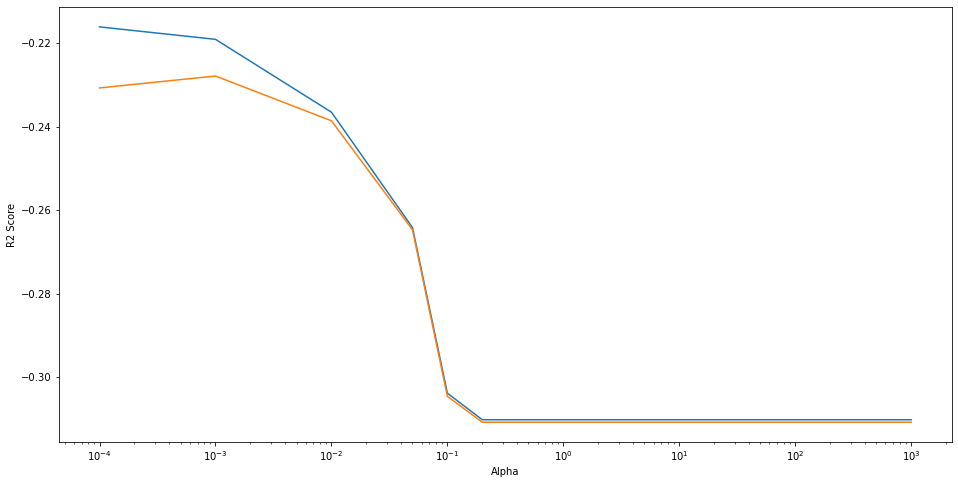

In [315]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_lasso_new['param_alpha'],cv_results_lasso_new['mean_train_score'])
plt.plot(cv_results_lasso_new['param_alpha'],cv_results_lasso_new['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [316]:
lasso_new2 = Lasso(alpha=0.001)
lasso_new2.fit(X_train_rfe_new,y_train)

Lasso(alpha=0.001)

In [317]:
y_train_pred_lasso_new2 = lasso.predict(X_train_rfe_new)
y_test_pred_lasso_new2 = lasso.predict(X_test_rfe_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred_lasso_new2))
print(r2_score(y_true=y_test,y_pred=y_test_pred_lasso_new2))

-0.323084145077458
-0.3448732961413612


In [318]:
lasso_new2.coef_

array([-0.1209989 ,  0.04458605, -0.        ,  0.00855369,  0.17369575,
       -0.        , -0.        , -0.00212815, -0.05461289,  0.        ,
        0.04981447,  0.18314656,  0.05263831, -0.04998878, -0.        ,
       -0.        , -0.        ,  0.07701931,  0.        ,  0.        ,
       -0.23525643, -0.00840643, -0.02649157, -0.15672343, -0.02176213,
        0.07367351,  0.        ,  0.10272108, -0.08901981,  0.00128502,
       -0.07571899,  0.        ,  0.29766649, -0.17987711,  0.        ,
        0.        , -0.12168986, -0.        ,  0.11190781,  0.09920933,
       -0.05394781, -0.        , -0.        ,  0.0470833 , -0.12213356,
       -0.04636983,  0.        ,  0.        ,  0.        ,  0.19799323])

In [319]:
# Put the Features and coefficienst in a dataframe

lasso_df_new2 = pd.DataFrame({'Features':X_train_rfe_new.columns, 'Coefficient':lasso_new2.coef_.round(4)})
lasso_df_new2.reset_index(drop=True, inplace=True)
lasso_df_new2.sort_values(by='Coefficient',ascending=False).head(10)

,Features,Coefficient
32,Foundation_PConc,0.2977
49,SaleCondition_Partial,0.1980
11,Condition1_PosA,0.1831
4,LotConfig_CulDSac,0.1737
38,PavedDrive_Y,0.1119
27,HouseStyle_2Story,0.1027
39,Fence_GdPrv,0.0992
17,BldgType_1Fam,0.0770
25,HouseStyle_2.5Fin,0.0737
12,Condition1_PosN,0.0526
